# Diamonds

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## EDA

In [3]:
df = pd.read_csv('Diamonds Prices2022.csv', index_col=0)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53943 entries, 1 to 53943
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

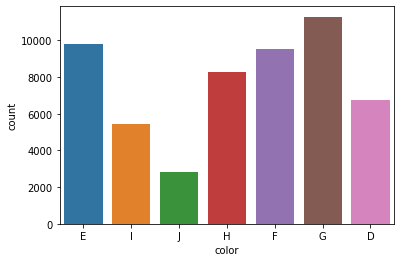

In [6]:
sns.countplot(df.color)

C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='count'>

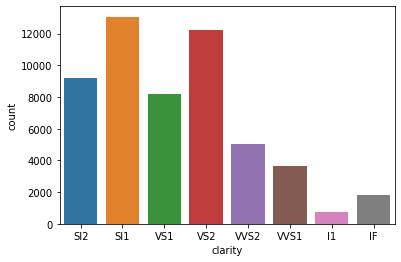

In [7]:
sns.countplot(df.clarity)

C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cut', ylabel='count'>

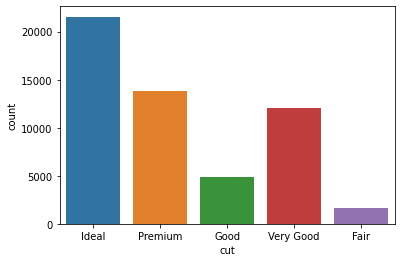

In [8]:

sns.countplot(df.cut)

# Dear outlier, can you see me? 

In [9]:
df.select_dtypes(include=np.number).columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

<Figure size 432x432 with 0 Axes>

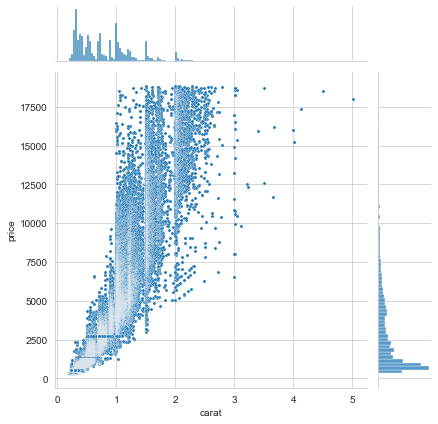

<Figure size 432x432 with 0 Axes>

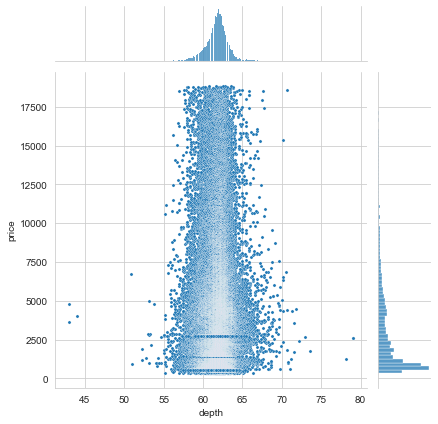

<Figure size 432x432 with 0 Axes>

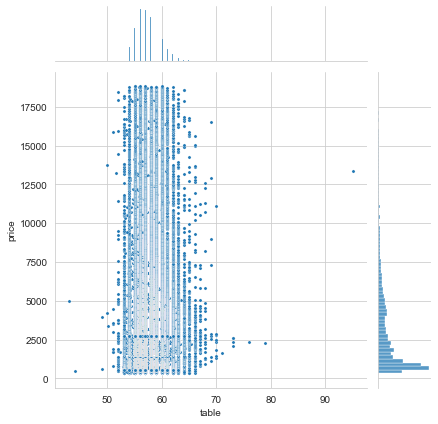

<Figure size 432x432 with 0 Axes>

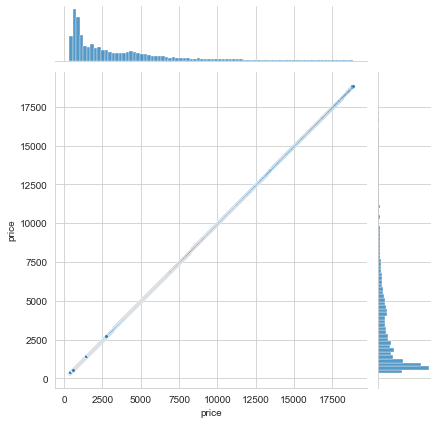

<Figure size 432x432 with 0 Axes>

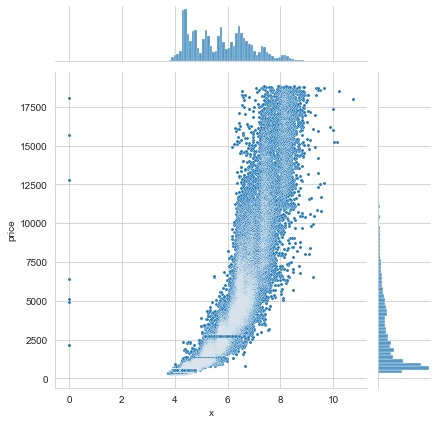

<Figure size 432x432 with 0 Axes>

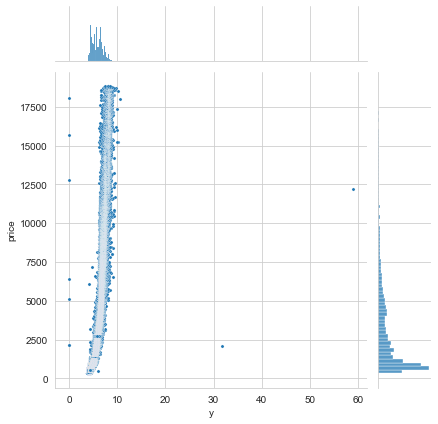

<Figure size 432x432 with 0 Axes>

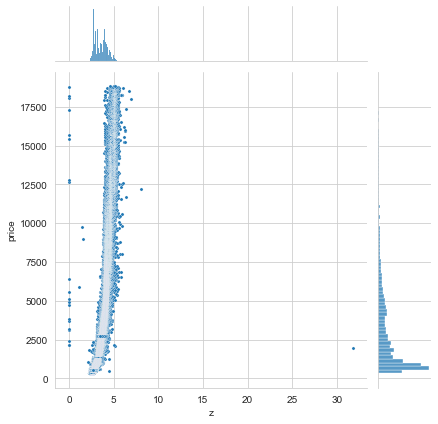

In [10]:
for col in df.select_dtypes(include=np.number).columns:
    sns.set_style('whitegrid')
    plt.figure(figsize=(6,6))
    x= df[col]
    y=df['price']
    sns.jointplot(x=x, y=y, s=10)


## Outlier cleaning

In [11]:
df=df[(df['carat']<3)&
    (df['depth']>=50)&
    (df['depth']<=70)&
    (df['table']>=50)&
    (df['table']<=70)&
    (df['x']!=0)&
    (df['y']!=0)&
    (df['y']<12)&
    (df['z']>2)&
    (df['z']<6)]
df.shape

(53840, 10)

### Let's see again

<Figure size 432x432 with 0 Axes>

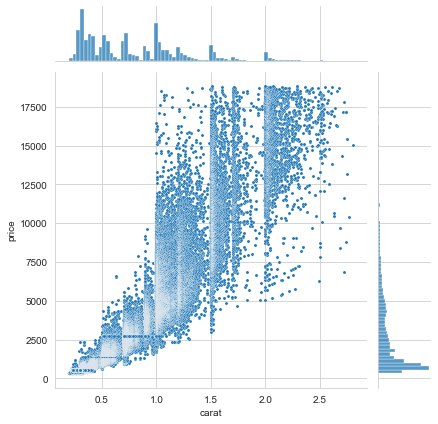

<Figure size 432x432 with 0 Axes>

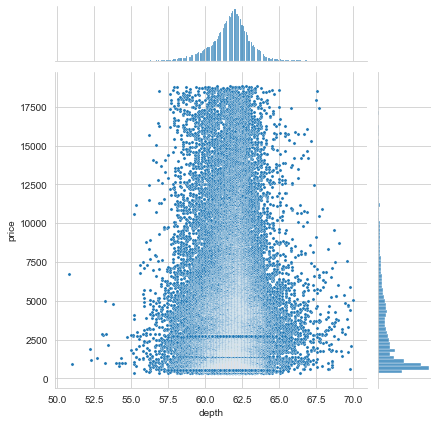

<Figure size 432x432 with 0 Axes>

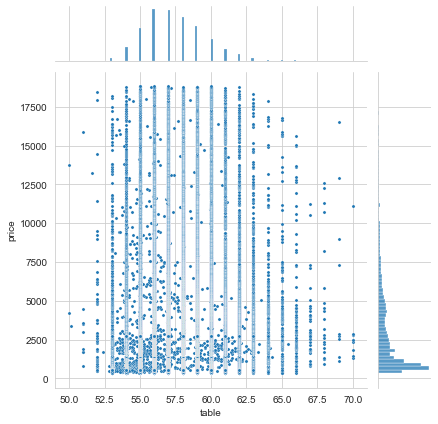

<Figure size 432x432 with 0 Axes>

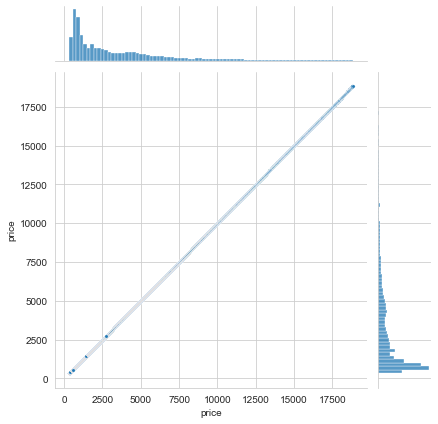

<Figure size 432x432 with 0 Axes>

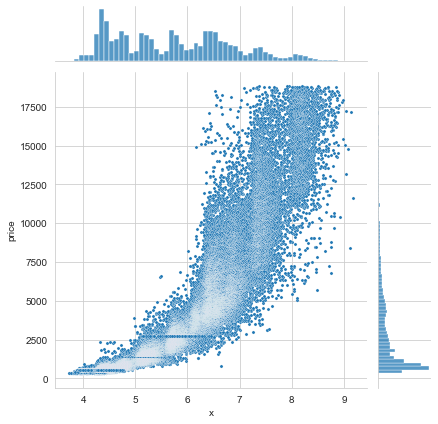

<Figure size 432x432 with 0 Axes>

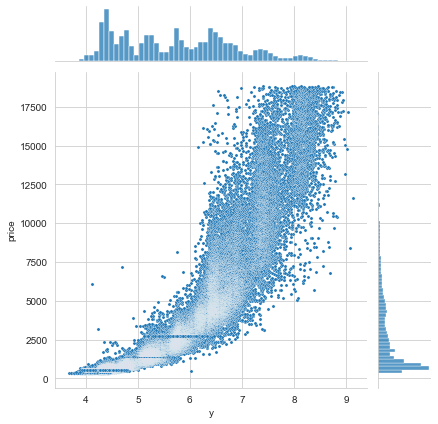

<Figure size 432x432 with 0 Axes>

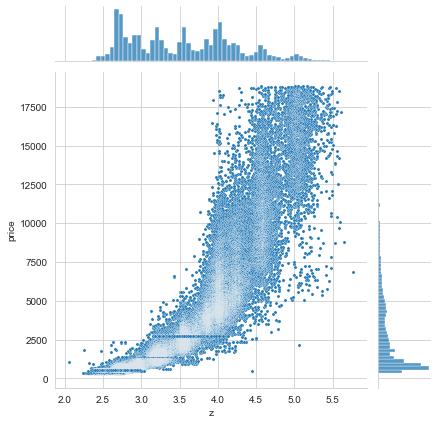

In [12]:
for col in df.select_dtypes(exclude=['object']).columns:
    sns.set_style('whitegrid')
    plt.figure(figsize=(6,6))
    x= df[col]
    y=df['price']
    sns.jointplot(x=x, y=y, s=10)

_It looks much better._

# Splitting into cathegorical and numerical features

In [13]:
df_num = df.select_dtypes(exclude=['object'])
df_cat = df.select_dtypes(include=['object'])
print('Categorical:', df_cat.columns,'\nNumerical: ', df_num.columns )

Categorical: Index(['cut', 'color', 'clarity'], dtype='object') 
Numerical:  Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


### Categorical features

Let's see the values for each categorical column

In [14]:
for col in df_cat.columns:
    print(col, ':', len(df[col].unique()), df[col].unique())

cut : 5 ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color : 7 ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity : 8 ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


Apply label encoder to each categorical column

In [15]:
label_enc = LabelEncoder()

for col in df_cat.columns:
    df_cat[col] = label_enc.fit_transform(df_cat[col])

df_cat

,cut,color,clarity
1,2,1,3
2,3,1,2
3,1,1,4
4,3,5,5
5,1,6,3
...,...,...,...
53939,3,4,3
53940,2,0,3
53941,3,1,2
53942,3,2,2


In [16]:
df_num

,carat,depth,table,price,x,y,z
1,0.23,61.5,55.0,326,3.95,3.98,2.43
2,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.23,56.9,65.0,327,4.05,4.07,2.31
4,0.29,62.4,58.0,334,4.20,4.23,2.63
5,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53939,0.86,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,59.8,62.0,2756,5.74,5.73,3.43


# Let's pick those features with stronger correlation

Text(0.5, 1.0, 'Correlation Map')

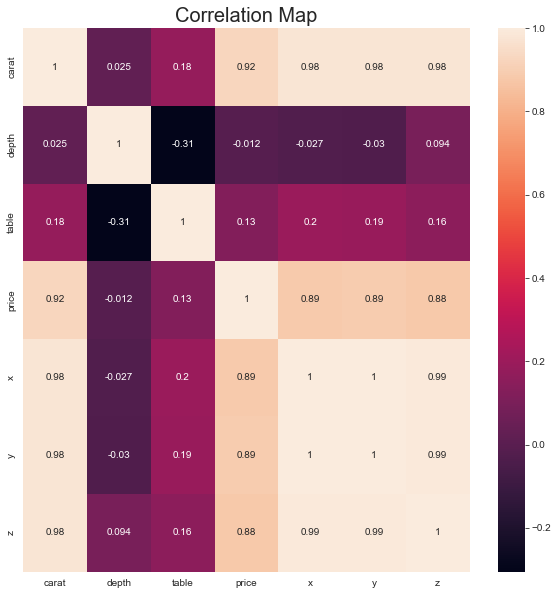

In [17]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_num.corr(), annot=True, square=False)
plt.title('Correlation Map', fontsize=20)

In [18]:
df_num.corr()['price'].sort_values(ascending=False)

price    1.000000
carat    0.923671
y        0.888530
x        0.886919
z        0.882569
table    0.126885
depth   -0.012053
Name: price, dtype: float64

Will choose  __carat__,__x__,__y__ and __z__ because they have the higher correlation

In [19]:
df = pd.concat([df_num[['price', 'carat','x','y','z']], df_cat], axis=1)
df

,price,carat,x,y,z,cut,color,clarity
1,326,0.23,3.95,3.98,2.43,2,1,3
2,326,0.21,3.89,3.84,2.31,3,1,2
3,327,0.23,4.05,4.07,2.31,1,1,4
4,334,0.29,4.20,4.23,2.63,3,5,5
5,335,0.31,4.34,4.35,2.75,1,6,3
...,...,...,...,...,...,...,...,...
53939,2757,0.86,6.15,6.12,3.74,3,4,3
53940,2757,0.75,5.83,5.87,3.64,2,0,3
53941,2756,0.71,5.79,5.74,3.49,3,1,2
53942,2756,0.71,5.74,5.73,3.43,3,2,2


# Let's do some Machine Learning

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

### Train_test_split

#### Considering numerical and cathegorical features

In [21]:
y = df.price.values
X = df.drop('price', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

print('X_train size: ',X_train.shape)
print('X_test size: ',X_test.shape)
print('y_train size: ',y_train.shape)
print('y_test size: ',y_test.shape)

X_train size:  (40380, 7)
X_test size:  (13460, 7)
y_train size:  (40380,)
y_test size:  (13460,)


Building pipelines with StandardScaler and Model for various regressors

In [22]:
pipeline_lr = Pipeline([('scalar1', StandardScaler()),
                        ('lr_classifier', LinearRegression())])
pipeline_tree = Pipeline([('scalar2', StandardScaler()),
                        ('tree_classifier', DecisionTreeRegressor())])
pipeline_forest = Pipeline([('scalar3', StandardScaler()),
                        ('RandomForest_classif', RandomForestRegressor())])
pipeline_knr = Pipeline([('scalar4', StandardScaler()),
                        ('KNeighborsRegressor', KNeighborsRegressor())])

# A list with all the pipelines

pipelines = [pipeline_lr, pipeline_tree, pipeline_forest, pipeline_knr]
pipelines_dict = {0:'LinearRegression', 1:'DecisionTree' , 2:'RandomForest', 3:'Kneighbors'}

Let's fit all the pipelines

In [23]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

Will do some CrossValidation and compare the scores

In [24]:
cv_results_rms= []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=10)
    cv_results_rms.append(cv_score)
    print('%s: %f' % (pipelines_dict[i], cv_score.mean()))

LinearRegression: -1304.421953
DecisionTree: -751.967612
RandomForest: -550.479680
Kneighbors: -635.659155


It seems that RandomForest was the one with less error. Let's test this model on the __test__ set and evaluate it with different metrics

In [25]:
pred_test = pipeline_forest.predict(X_test)

In [26]:
# Model Evaluation

print('R^2:                     ', metrics.r2_score(y_test, pred_test),
    '\nMeanSquaredError:        ', metrics.mean_squared_error(y_test, pred_test),
    '\nRootMeanSquaredError:    ', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))


R^2:                      0.9802748233705141 
MeanSquaredError:         311074.7305153538 
RootMeanSquaredError:     557.7407377226033
